<a href="https://colab.research.google.com/github/qmcnn/Data-Mining/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/tohnperfect/KKU_Data_Mining/blob/master/Kmean_Clustering.ipynb

# Generate Data

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [ ]:
X.shape

(300, 2)

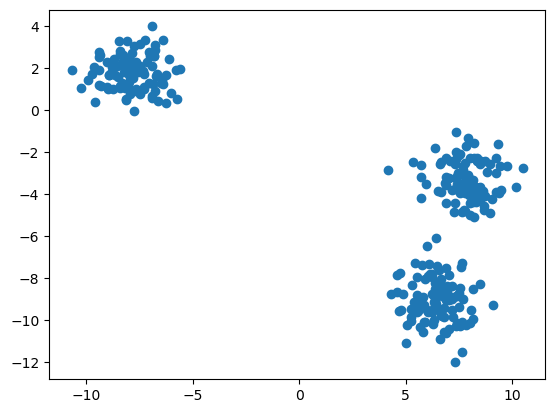

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

## Import

In [ ]:
from sklearn.cluster import KMeans

## Define

In [ ]:
KMclust = KMeans(n_clusters=5)

## Train

In [ ]:
KMclust.fit(X)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

## Predict

In [ ]:
label = KMclust.predict(X)

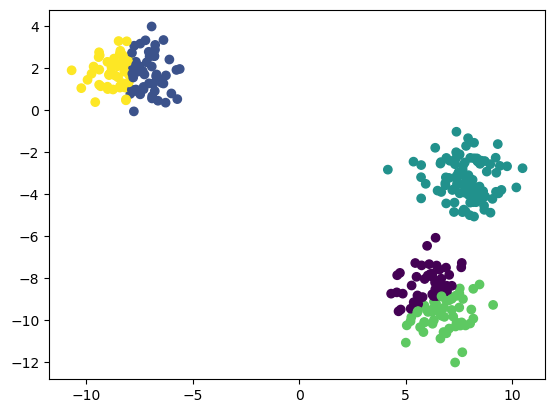

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=label)

# Color quantization (application of kmean)

In [ ]:
import cv2
import os

In [ ]:
path = ''
img = cv2.imread(os.path.join(path,'PeacockHP-691483428.jpg'))

In [ ]:
img

array([[[ 72, 233, 255],
        [ 83, 247, 255],
        [ 63, 229, 255],
        ...,
        [ 86, 152, 141],
        [109, 176, 171],
        [ 39, 109, 108]],

       [[ 66, 219, 250],
        [ 42, 193, 227],
        [ 65, 215, 252],
        ...,
        [123, 188, 179],
        [ 99, 167, 166],
        [ 52, 122, 122]],

       [[ 41, 178, 227],
        [ 61, 189, 240],
        [ 76, 188, 241],
        ...,
        [103, 169, 164],
        [ 56, 123, 126],
        [102, 170, 177]],

       ...,

       [[ 35, 186, 123],
        [  0, 155,  94],
        [ 31, 194, 138],
        ...,
        [ 54, 132,  91],
        [ 47, 114,  82],
        [ 52, 116,  86]],

       [[ 31, 152, 101],
        [ 31, 164, 114],
        [ 55, 206, 161],
        ...,
        [105, 192, 159],
        [ 86, 158, 135],
        [ 77, 144, 123]],

       [[ 89, 197, 151],
        [ 85, 206, 162],
        [ 69, 211, 174],
        ...,
        [112, 204, 175],
        [ 96, 171, 150],
        [ 87, 154, 139]]

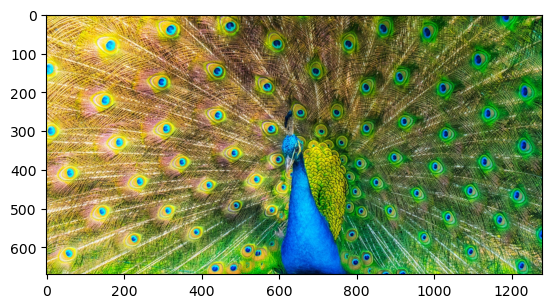

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [ ]:
RGB_img.shape

(670, 1280, 3)

## count unique colors

In [ ]:
import numpy as np

In [ ]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(469071, 3)

## Use K-mean to reduce color from 256 colors to 8 colors

In [ ]:
#Define
myQuantize = KMeans(n_clusters=8)

In [ ]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row

array([[255, 233,  72],
       [255, 247,  83],
       [255, 229,  63],
       ...,
       [175, 204, 112],
       [150, 171,  96],
       [139, 154,  87]], dtype=uint8)

In [ ]:
img_row.shape

(857600, 3)

In [ ]:
#Train
myQuantize.fit(img_row)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
#Predict
res = myQuantize.predict(img_row)

In [ ]:
res

array([3, 3, 3, ..., 0, 0, 7], dtype=int32)

## Get cluster centers

In [ ]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[170.87984752, 162.86575881, 102.63817535],
       [ 91.74218946,  93.52276075,  37.40160643],
       [  8.03603077, 133.45817509, 215.94162041],
       [213.70281508, 191.7817766 ,  51.02017756],
       [ 40.18861713, 138.57867646,  49.95433829],
       [230.25323345, 208.59398859, 148.18462301],
       [ 38.21194196,  64.07435839,  20.73526152],
       [133.28893656, 132.81573745,  58.86659336]])

In [ ]:
Clus_cen.shape

(8, 3)

## Map color back to the image

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [ ]:
new_img_ = new_img/255

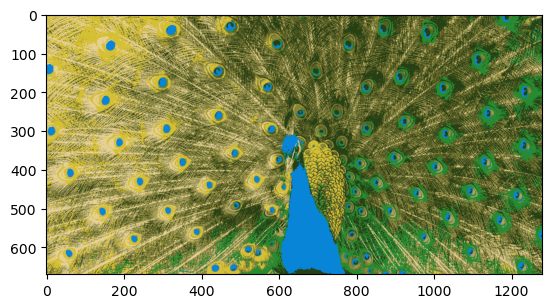

In [ ]:
plt.imshow(new_img_)

## Use K-mean to reduce color from 256 colors to 3 colors

In [ ]:
#Define
myQuantize = KMeans(n_clusters=8)

In [ ]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row

array([[255, 233,  72],
       [255, 247,  83],
       [255, 229,  63],
       ...,
       [175, 204, 112],
       [150, 171,  96],
       [139, 154,  87]], dtype=uint8)

In [ ]:
img_row.shape

(857600, 3)

In [ ]:
#Train
myQuantize.fit(img_row)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
#Predict
res = myQuantize.predict(img_row)

In [ ]:
res

array([0, 0, 0, ..., 3, 3, 4], dtype=int32)

## Get cluster centers

In [ ]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[213.70540812, 191.81983141,  50.93868999],
       [ 38.20954045,  64.07209284,  20.73425034],
       [  8.04325706, 133.46365628, 215.93617332],
       [171.03332368, 162.89337869, 102.63505908],
       [133.26898535, 132.84041563,  58.92101519],
       [ 91.75297541,  93.51703945,  37.38825486],
       [ 40.18611821, 138.57003537,  49.94942026],
       [230.27510027, 208.63050834, 148.20968606]])

In [ ]:
Clus_cen.shape

(8, 3)

## Map color back to the image

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [ ]:
new_img_ = new_img/255

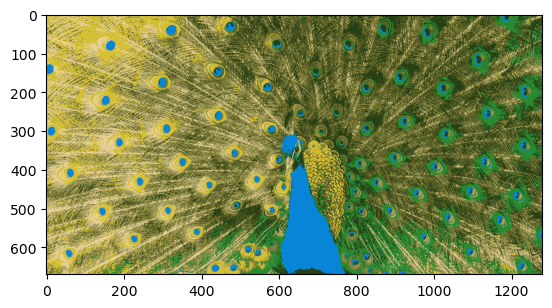

In [ ]:
plt.imshow(new_img_)

## Overlapping Groups
https://machinelearningmastery.com/clustering-algorithms-with-python/

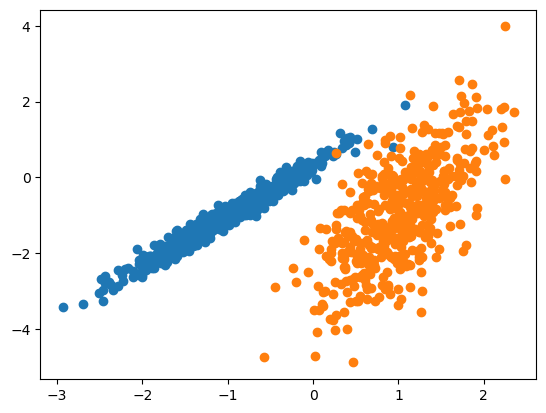

In [ ]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


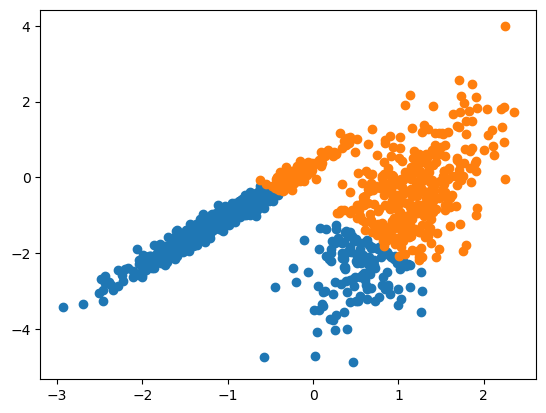

In [ ]:
# k-means clustering
from numpy import unique
from sklearn.cluster import KMeans
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

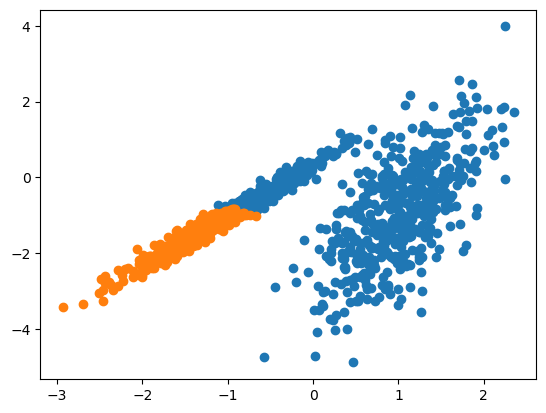

In [ ]:
# agglomerative clustering
from numpy import unique
from sklearn.cluster import AgglomerativeClustering
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

https://scikit-learn.org/stable/modules/clustering.html